In [7]:
import requests
import numpy as np
import json
import pandas as pd
import sys
import collections
import scipy
import matplotlib.pyplot as plt
from PIL import Image
import ibmseti

In [3]:
import tensorflow as tf
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))

[[ 22.  28.]
 [ 49.  64.]]


In [4]:
r = requests.get('https://dal.objectstorage.open.softlayer.com/v1/AUTH_cdbef52bdf7a449c96936e1071f0a46b/simsignals_files/public_list_headers_3april_2017.txt')

In [5]:
fileList = r.text.split('\n')[:-1]
fileListJSON = [json.loads(entry) for entry in fileList]
fileListJSON[0]

{u'file_name': u'00069203-0824-4136-9c99-b9f68672f23d.dat',
 u'signal_classification': u'squigglesquarepulsednarrowband',
 u'uuid': u'00069203-0824-4136-9c99-b9f68672f23d'}

## Code for analyzing periodograms

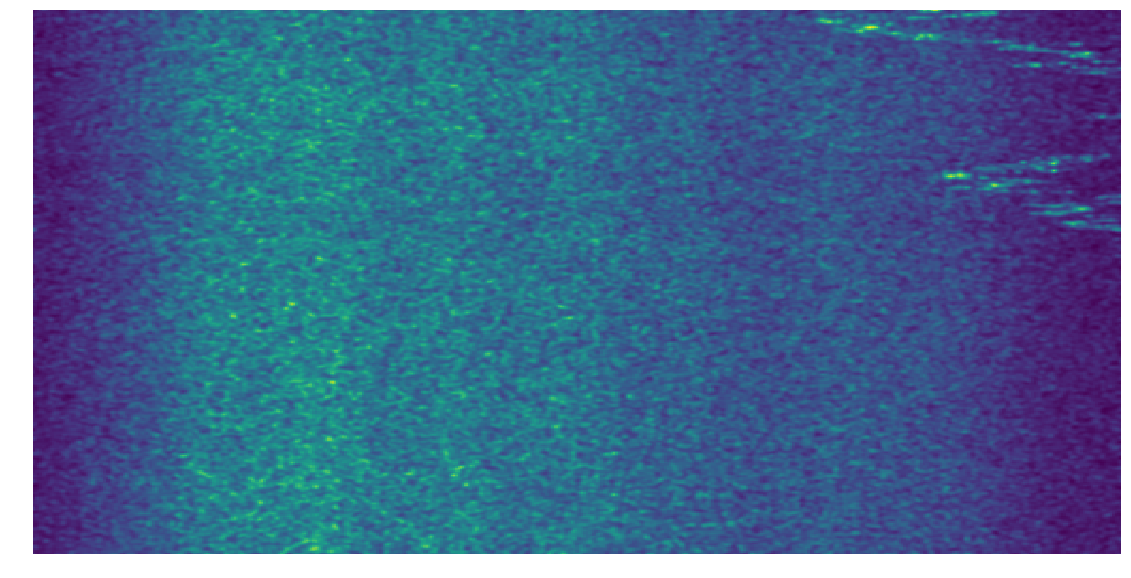

In [8]:
#********************Configuration Parameters Start************************#
# This is the expected pixel width of the output image, height is determined automatically
desiredImageWidth = 512
assert desiredImageWidth&31 == 0 , "Desired Image width should be a multiple of 32"
# How much should should the periodogram frequency be scaled by determines periodogram length
periodogramFrequencyScaling = 4
# rotatePSD - accounts for the 90 degree rotation caused by the Welch Periodogram
rotatePsd = True
# Normalize PSD
NormalizePsd = True
# Gauss Filter PSD
GaussFilterPsd = True
# Number of columns eliiminatd fromthe periodogram to preven the vertical line around the center frequency
numEliminatedColumns = 2
#********************Configuration Parameters End**************************#

base_url = 'https://dal.objectstorage.open.softlayer.com/v1/AUTH_cdbef52bdf7a449c96936e1071f0a46b'
container = 'simsignals'
# bright pixel - couldn't see any signal here visually
#fname = '10f26c01-5a62-44da-a489-3c2fabf010d7.dat'
#fname = '0196e075-9b1c-42d8-a13c-5b2b3814df2f.dat'
#fname = '019f43e7-01df-4e08-a25b-29c0387110f0.dat'
#fname = '01b7db03-b837-477d-a943-7ab3442e4052.dat'
#fname = '01d7910d-f2ec-4685-9569-dcd5ad6ac7b7.dat'
#fname = '020c38ae-43f2-4413-9c28-97af18abc096.dat'
#fname = '02271dff-b866-403d-872a-7b9eeebb2a6e.dat'
#fname = '02392dc5-68c4-481b-8196-d0be9e017df6.dat'
#fname = '02464dcd-8627-4dd3-86b2-43f96090400a.dat'
#fname = '02582067-307f-4e63-9f90-d04e80eed361.dat'
#fname = '025ee66e-a318-400c-b62b-850d31f6d0c2.dat'
# bright pixel - couldn't see any signal here visually
#fname = '01b7db03-b837-477d-a943-7ab3442e4052.dat'
#squiggle
#fname = '002193db-6f0e-4e2a-a7a4-6fc038a1b2a7.dat'
#squiggle
fname = '4e9eb559-24ee-4f26-a054-1cc028399f81.dat'
#fname = '00187356-1b8e-48e2-a2e9-b3983983d2f1.dat'
#fname = '018872a6-b7f3-4ed9-bcfc-263a6249f2d2.dat'
#fname =  '019d208b-9d42-42c0-be7f-62c7d932b01e.dat'
#fname =  '01e07abb-c752-43e9-8938-e58b8af894dd.dat'
#fname =  '01f8d5df-2c75-4a56-afd1-704d07abe62b.dat'
#fname =  '020ba5ed-3344-4e4d-8f40-299e5604e206.dat'
#fname =  '029f4823-ed96-4f1d-b31b-e257e5a804f3.dat'
#fname =  '02afce62-af21-4931-b584-e80cc220f582.dat'
#fname =  '02c2140a-388f-4c45-aabf-d8db19a6bb3d.dat'
#fname =  '02fe0cc0-9562-46b8-8742-cc31ff1c843a.dat'
#fname =  '0310cd36-e4af-4b48-8565-d123e90a18e2.dat'
# narrow band
#fname = '01537aca-6c58-410a-96bc-d7ddcf2a3b50.dat'
#fname =  '0173a761-ab33-482d-939a-9e5b0c6ea46b.dat'
#fname = '018de612-bbf8-4a93-b6f3-228ee6e9a036.dat'
#fname =  '01938210-c78b-457d-a1ba-d74c963e0b5a.dat'
#fname =  '01a6b92e-cfbb-4dcc-9833-a797c9686788.dat'
#fname =  '01efda97-ca7a-4ca3-94d6-75b547a6cfe4.dat'
#fname =  '01fbbb2a-f557-4930-bae0-a65c6a2c0585.dat'
#fname =  '020c1527-7591-44b1-83d1-a0a704f8433e.dat'
#fname =  '0224ea7f-2554-4c47-b13e-f04af8a07a1e.dat'
#fname =  '02aa2163-5abd-4442-a72f-3eb79703330c.dat'
#fname =  '02bf5d69-6d95-477b-90ba-3be0c3bc0a14.dat'
# narrow band DRD
#fname =  '031573df-0a3d-4e6b-8140-20c6aa9b7be0.dat'
#fname =  '000874dd-8d6e-44b1-8ade-21aeb5a29546.dat'
#fname =  '0179a993-f7d1-41db-a39f-5190e826a4bc.dat'
#fname =  '0192fc3f-6f81-45de-8023-de6746dcb7d9.dat'
#fname =  '019eb2f3-907b-40f6-a83a-5f3b1666c9eb.dat'
#fname =  '01d2c643-575f-49d7-8674-15222c6767f2.dat'
#fname =  '01d3aa7d-e30d-4824-8a01-c3c174f25915.dat'
#fname =  '01e232fe-7d5f-4d80-8b18-2446caf4a3f1.dat'
#fname =  '01eac674-6718-4595-bc97-2d06c991b09a.dat'
#fname =  '020376b0-f777-416b-b338-43335c305ac7.dat'
#fname =  '021fa4aa-014a-4001-8ed8-ab62627ef44e.dat'
#fname =  '0232277a-c533-4039-a3b8-9cbbf903ce5a.dat'
# squared pulse narrow band
#fname =  '06966d7e-8b8a-44f0-9703-3b8bc9e83c18.dat'
#fname =  '00187356-1b8e-48e2-a2e9-b3983983d2f1.dat'
#fname =  '017f886d-52b2-4a7a-8765-1d46d4b7398f.dat'
#fname =  '01941116-dbf6-4062-9336-651dc88ab60e.dat'
#fname =  '019caf8f-5438-4ed7-a3e6-beebd84d65b2.dat'
#fname =  '01de87c2-13b0-4856-825f-bd534703029d.dat'
#fname =  '01e52d66-a38a-4905-9683-80ef74b783ad.dat'
#fname =  '01ee3353-f090-4b97-ad2f-a4c13970951f.dat'
#fname =  '01fbd2d9-3b39-4b33-8a47-955cf35717d9.dat'
#fname =  '0209918f-571a-43ad-8307-004380e6e138.dat'
#fname =  '0235701e-791c-46ed-a6e9-e090a7b7bf2c.dat'
#fname =  '0237063d-3f64-4bd5-91f6-02f3bcf1353f.dat'
# squiggle squared pulse narrow band
#fname =  '002193db-6f0e-4e2a-a7a4-6fc038a1b2a7.dat'
#fname =  '0176c146-6ff2-4742-aa07-b4a6bdd67876.dat'
#fname =  '01a407c6-574a-4fd0-9c37-ad56bb3483d1.dat'
#fname =  '01c9fb1d-3415-48dd-85f2-1c908449be64.dat'
#fname =  '01ca1408-fea8-4320-b6cf-bd1dbcc22c31.dat'
#fname =  '01f1100a-b8d6-49d9-bef3-ce6554f27af6.dat'
#fname =  '01fd8c46-2959-45c5-8fa1-827070586dd1.dat'
#fname =  '0207a7b4-4534-44cf-85f2-fa6fdaeb6033.dat'
#fname =  '0213c6d2-8642-4e80-ae4c-d3b690b753fc.dat'
#fname =  '02b54754-fe5a-4f73-a92c-05925a796b7a.dat'
#fname =  '02dd60ac-adfc-4cb4-a161-8e80d565966f.dat'
# Convert the width ad
# 1.Get a signal from the above list
r1 = requests.get('{}/{}/{}'.format(base_url, container, fname))
aca1 = ibmseti.compamp.SimCompamp(r1.content)
originalSignal = aca1.get_signal()
# 2. Get the signal dimensions
rawSignalLength = originalSignal.shape[0]
#print(rawSignalLength)
# 3. Finding the closest multiple of 32 for final image width
desiredImageWidth = ((desiredImageWidth)&(~31))
#  This is also the segment length of the periodoogram(num frequency bins)
npersegIn = desiredImageWidth
#print(desiredImageWidth)
# 4. Signal width as determined by the frequency scaling needed for noise rejection
signalWidth = desiredImageWidth * periodogramFrequencyScaling+numEliminatedColumns
# Finding the scaled signal length to accommodate width as a multiple of desiredImageWidth*periodogramFrequencyScaling and height as a multiple of 32
scaledSignalLength = signalWidth * ((rawSignalLength/signalWidth)&(~31))
#print(scaledSignalLength)
signalHeight = scaledSignalLength/signalWidth
scaledSignal = originalSignal[0:scaledSignalLength]
# 5. Reshaping the scaled signal
#print(scaledSignal.shape)
#print(signalWidth)
#print(signalHeight)
#print(signalWidth*signalHeight)
reshapedSignal = aca1._reshape(scaledSignal,(signalHeight,signalWidth))
#signalHeight =  rawSignalLength / signalWidth
#print(npersegIn)
#print(originalSignal.shape[0])
#reshapedSignal = aca1._reshape(originalSignal,(387,2048))
#absolute of the reshaped signal
#reshapedSignalAbs = np.abs(reshapedSignal)
#print(reshapedSignalAbs[0][0])
# 6. Computing the periodogoram
from scipy import signal
welchPeriodogram = signal.welch(reshapedSignal,fs= 8000, nperseg=npersegIn,return_onesided=False)
#print(welchPeriodogram[0].shape)
#print(welchPeriodogram[0])
#print(welchPeriodogram[1].shape)
powerSpectralDensity = welchPeriodogram[1]
#periodogramFrequencies = welchPeriodogram[0]
#normalizing
#normalizedPSD = powerSpectralDensity/np.linalg.norm(powerSpectralDensity)
# 7. Rotating the periodogoram + gauss filtering + normalizing
rotatedPSD = np.hstack((powerSpectralDensity[:,256:(desiredImageWidth - numEliminatedColumns/2)],powerSpectralDensity[:,numEliminatedColumns/2:desiredImageWidth/2]))
rotatedPSDGaussFiltered = scipy.ndimage.filters.gaussian_filter(rotatedPSD,sigma=1,order=0,mode="nearest")
rotatedNormalizedPSDGaussFiltered = rotatedPSDGaussFiltered/np.linalg.norm(rotatedPSDGaussFiltered)
#print(np.hstack((normalizedPSD_gaussFiltered[:,256:512],normalizedPSD_gaussFiltered[:,0:256])).shape)
#rotatedNormalizedPSDGaussFiltered = np.hstack((normalizedPSDGaussFiltered[:,256:510],normalizedPSDGaussFiltered[:,2:256]))
%matplotlib inline
plt.gray()
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow((rotatedNormalizedPSDGaussFiltered), aspect = 0.5*float(rotatedNormalizedPSDGaussFiltered.shape[1]) / rotatedNormalizedPSDGaussFiltered.shape[0],cmap="viridis",interpolation='nearest')
ax.axis('off')
# Saving the plot
specPath = '../data/generatedImages/'
pltType = '_rotNormGaussFiltPSD'
plt.savefig("{}{}{}.png".format(specPath,fname,pltType))
# reopening in gray scale
from PIL import Image
img = Image.open("{}{}{}.png".format(specPath,fname,pltType)).convert('LA')
img = img.resize((desiredImageWidth,signalHeight), Image.LANCZOS)
img.save('{}{}{}Greyscale.png'.format(specPath,fname,pltType))
#print(rotatedNormalizedPSDGaussFiltered)
#img = Image.fromarray(rotatedNormalizedPSDGaussFiltered)
#img.save('my.png')
#img.show()
# understanding frequencies in the periodogram
#periodogramFrequencies = welchPeriodogram[0]
#print(periodogramFrequencies.shape)


# Code for analyzing spectrogram generation

(129, 6144)


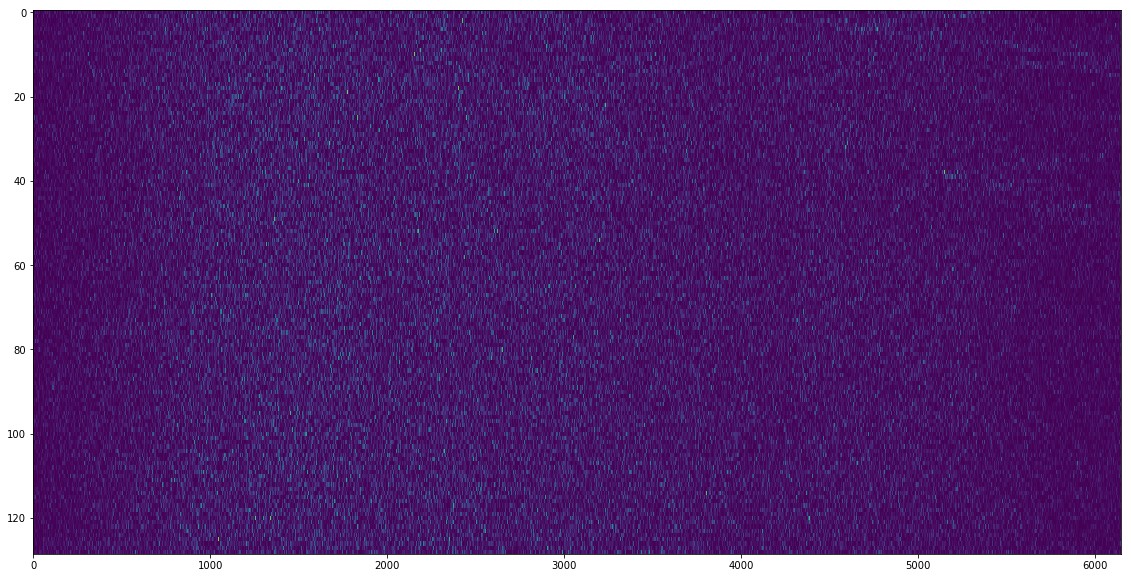

In [10]:
base_url = 'https://dal.objectstorage.open.softlayer.com/v1/AUTH_cdbef52bdf7a449c96936e1071f0a46b'
container = 'simsignals'
# bright pixel - couldn't see any signal here visually
#fname = '10f26c01-5a62-44da-a489-3c2fabf010d7.dat'
#fname = '0196e075-9b1c-42d8-a13c-5b2b3814df2f.dat'
#fname = '019f43e7-01df-4e08-a25b-29c0387110f0.dat'
#fname = '01b7db03-b837-477d-a943-7ab3442e4052.dat'
#fname = '01d7910d-f2ec-4685-9569-dcd5ad6ac7b7.dat'
#fname = '020c38ae-43f2-4413-9c28-97af18abc096.dat'
#fname = '02271dff-b866-403d-872a-7b9eeebb2a6e.dat'
#fname = '02392dc5-68c4-481b-8196-d0be9e017df6.dat'
#fname = '02464dcd-8627-4dd3-86b2-43f96090400a.dat'
#fname = '02582067-307f-4e63-9f90-d04e80eed361.dat'
#fname = '025ee66e-a318-400c-b62b-850d31f6d0c2.dat'
# bright pixel - couldn't see any signal here visually
#fname = '01b7db03-b837-477d-a943-7ab3442e4052.dat'
#squiggle
#fname = '002193db-6f0e-4e2a-a7a4-6fc038a1b2a7.dat'
#squiggle
fname = '4e9eb559-24ee-4f26-a054-1cc028399f81.dat'
#fname = '00187356-1b8e-48e2-a2e9-b3983983d2f1.dat'
#fname = '018872a6-b7f3-4ed9-bcfc-263a6249f2d2.dat'
#fname =  '019d208b-9d42-42c0-be7f-62c7d932b01e.dat'
#fname =  '01e07abb-c752-43e9-8938-e58b8af894dd.dat'
#fname =  '01f8d5df-2c75-4a56-afd1-704d07abe62b.dat'
#fname =  '020ba5ed-3344-4e4d-8f40-299e5604e206.dat'
#fname =  '029f4823-ed96-4f1d-b31b-e257e5a804f3.dat'
#fname =  '02afce62-af21-4931-b584-e80cc220f582.dat'
#fname =  '02c2140a-388f-4c45-aabf-d8db19a6bb3d.dat'
#fname =  '02fe0cc0-9562-46b8-8742-cc31ff1c843a.dat'
#fname =  '0310cd36-e4af-4b48-8565-d123e90a18e2.dat'
# narrow band
#fname = '01537aca-6c58-410a-96bc-d7ddcf2a3b50.dat'
#fname =  '0173a761-ab33-482d-939a-9e5b0c6ea46b.dat'
#fname = '018de612-bbf8-4a93-b6f3-228ee6e9a036.dat'
#fname =  '01938210-c78b-457d-a1ba-d74c963e0b5a.dat'
#fname =  '01a6b92e-cfbb-4dcc-9833-a797c9686788.dat'
#fname =  '01efda97-ca7a-4ca3-94d6-75b547a6cfe4.dat'
#fname =  '01fbbb2a-f557-4930-bae0-a65c6a2c0585.dat'
#fname =  '020c1527-7591-44b1-83d1-a0a704f8433e.dat'
#fname =  '0224ea7f-2554-4c47-b13e-f04af8a07a1e.dat'
#fname =  '02aa2163-5abd-4442-a72f-3eb79703330c.dat'
#fname =  '02bf5d69-6d95-477b-90ba-3be0c3bc0a14.dat'
# narrow band DRD
#fname = '0179a993-f7d1-41db-a39f-5190e826a4bc.dat'
#fname =  '0192fc3f-6f81-45de-8023-de6746dcb7d9.dat'
#fname =  '019eb2f3-907b-40f6-a83a-5f3b1666c9eb.dat'
#fname =  '01d2c643-575f-49d7-8674-15222c6767f2.dat'
#fname =  '01d3aa7d-e30d-4824-8a01-c3c174f25915.dat'
#fname =  '01e232fe-7d5f-4d80-8b18-2446caf4a3f1.dat'
#fname =  '01eac674-6718-4595-bc97-2d06c991b09a.dat'
#fname =  '020376b0-f777-416b-b338-43335c305ac7.dat'
#fname =  '021fa4aa-014a-4001-8ed8-ab62627ef44e.dat'
#fname =  '0232277a-c533-4039-a3b8-9cbbf903ce5a.dat'
# squared pulse narrow band
#fname = '017f886d-52b2-4a7a-8765-1d46d4b7398f.dat'
#fname =  '01941116-dbf6-4062-9336-651dc88ab60e.dat'
#fname =  '019caf8f-5438-4ed7-a3e6-beebd84d65b2.dat'
#fname =  '01de87c2-13b0-4856-825f-bd534703029d.dat'
#fname =  '01e52d66-a38a-4905-9683-80ef74b783ad.dat'
#fname =  '01ee3353-f090-4b97-ad2f-a4c13970951f.dat'
#fname =  '01fbd2d9-3b39-4b33-8a47-955cf35717d9.dat'
#fname =  '0209918f-571a-43ad-8307-004380e6e138.dat'
#fname =  '0235701e-791c-46ed-a6e9-e090a7b7bf2c.dat'
#fname =  '0237063d-3f64-4bd5-91f6-02f3bcf1353f.dat'
# squiggle squared pulse narrow band
#fname =   '0176c146-6ff2-4742-aa07-b4a6bdd67876.dat'
#fname =    '01a407c6-574a-4fd0-9c37-ad56bb3483d1.dat'
#fname =    '01c9fb1d-3415-48dd-85f2-1c908449be64.dat'
#fname =    '01ca1408-fea8-4320-b6cf-bd1dbcc22c31.dat'
#fname =    '01f1100a-b8d6-49d9-bef3-ce6554f27af6.dat'
#fname =    '01fd8c46-2959-45c5-8fa1-827070586dd1.dat'
#fname =    '0207a7b4-4534-44cf-85f2-fa6fdaeb6033.dat'
#fname =    '0213c6d2-8642-4e80-ae4c-d3b690b753fc.dat'
#fname =    '02b54754-fe5a-4f73-a92c-05925a796b7a.dat'
#fname =    '02dd60ac-adfc-4cb4-a161-8e80d565966f.dat'

r1 = requests.get('{}/{}/{}'.format(base_url, container, fname))
aca1 = ibmseti.compamp.SimCompamp(r1.content)
spec1 = aca1.get_spectrogram()
print(spec1.shape)
#normalizing
#spec1 = spec1/np.linalg.norm(spec1)
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow((spec1), aspect = 0.5*float(spec1.shape[1]) / spec1.shape[0],cmap="viridis")
specPath = '../data/marcTrial/'
pltType = '_sourcePlot'
plt.savefig("{}{}{}.png".format(specPath,fname,pltType))

# Local convolve operation

In [ ]:
base_url = 'https://dal.objectstorage.open.softlayer.com/v1/AUTH_cdbef52bdf7a449c96936e1071f0a46b'
container = 'simsignals'
r1 = requests.get('{}/{}/{}'.format(base_url, container, fname))
aca1 = ibmseti.compamp.SimCompamp(r1.content)
spec1 = aca1.get_spectrogram()
#normalizing
#spec1 = spec1/np.linalg.norm(spec1)
#spec1 = threshold(spec1, 0.001)
#print(spec1.shape)
#print(spec1)
# convolving with a gaussian filter
gaussSpec1 = scipy.ndimage.filters.gaussian_filter(spec1,sigma=2,order=0,mode="nearest")
#Thresholding - 
#from scipy.stats import threshold
#gaussSpec1 = threshold(gaussSpec1, 0.001)
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(np.square(gaussSpec1), aspect = 0.5*float(gaussSpec1.shape[1]) / gaussSpec1.shape[0],cmap="viridis")
specPath = '../data/marcTrial/'
pltType = '_gaussFilteredPlot'
plt.savefig("{}{}{}.png".format(specPath,fname,pltType))
print(fname)
#maxSpec1 = scipy.ndimage.filters.maximum_filter(gaussSpec1,2)
#ax.imshow(np.log(maxSpec1), aspect = 0.5*float(maxSpec1.shape[1]) / maxSpec1.shape[0])
#specPath = 'data/marcTrial/'
#pltType = '_maxFilteredPlot'
#plt.savefig("{}{}{}.png".format(specPath,fname,pltType))

## Testing BM3D

In [ ]:
base_url = 'https://dal.objectstorage.open.softlayer.com/v1/AUTH_cdbef52bdf7a449c96936e1071f0a46b'
container = 'simsignals'
r1 = requests.get('{}/{}/{}'.format(base_url, container, fname))
aca1 = ibmseti.compamp.SimCompamp(r1.content)
spec1 = aca1.get_spectrogram()
#normalizing
spec1 = spec1/np.linalg.norm(spec1)
print(spec1.shape)
#import skimage
#x  = skimage.data.camera().astype(np.float32)
#print(x.shape)
# convolving with a gaussian filter
gaussSpec1 = scipy.ndimage.filters.gaussian_filter(spec1,2)
gaussSpec1.shape = gaussSpec1.shape[0], gaussSpec1.shape[1], 1
gaussSpec1Float = gaussSpec1.astype(np.float32)
spec1GaussBm3d = pybm3d.bm3d.bm3d(gaussSpec1Float,10.0)
#spec1GaussBm3d =spec1GaussBm3d.reshape(spec1GaussBm3d.shape[0:1])
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(spec1GaussBm3d[:, :, 0], aspect = 0.5*float(spec1GaussBm3d.shape[1]) / spec1GaussBm3d.shape[0])
specPath = '../data/marcTrial/'
pltType = '_gauss_bm3d_FilteredPlot'
plt.savefig("{}{}{}.png".format(specPath,fname,pltType))
print(fname)

## Testing other image denoising techniques

In [ ]:
base_url = 'https://dal.objectstorage.open.softlayer.com/v1/AUTH_cdbef52bdf7a449c96936e1071f0a46b'
container = 'simsignals'
r1 = requests.get('{}/{}/{}'.format(base_url, container, fname))
aca1 = ibmseti.compamp.SimCompamp(r1.content)
spec1 = aca1.get_spectrogram()
#normalizing
spec1 = spec1/np.linalg.norm(spec1)
print(spec1.shape)
#import skimage
#x  = skimage.data.camera().astype(np.float32)
#print(x.shape)
# convolving with a gaussian filter
gaussSpec1 = scipy.ndimage.filters.gaussian_filter(spec1,2)
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(np.square(denoise_bilateral(gaussSpec1,multichannel=False)), aspect = 0.5*float(gaussSpec1.shape[1]) / gaussSpec1.shape[0])
#ax.imshow(np.log(gaussSpec1), aspect = 0.5*float(gaussSpec1.shape[1]) / gaussSpec1.shape[0])
specPath = '../data/marcTrial/'
pltType = '_gauss_bm3d_FilteredPlot'
plt.savefig("{}{}{}.png".format(specPath,fname,pltType))
print(fname)

## Testing edge detection

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
#pltType = '_sourcePlot'
pltType = '_gaussFilteredPlot'
#image = mpimg.imread("{}{}{}.png".format(specPath,fname,pltType))
#edges = cv2.Canny(img,100,200)
image = cv2.imread("{}{}{}.png".format(specPath,fname,pltType))
edges = cv2.Canny(image,200,100)
np.histogram(image) 
plt.imshow(edges)
plt.show()
#print(img.shape)
#print(img)
#edges = cv2.Canny(img,100,200)
#fig, ax = plt.subplots(figsize=(20, 10))
#ax.imshow(img,aspect=img.shape[1]/img.shape[0])
#print(fname)

# Regenerating image as gray scale

In [ ]:
fname = "{}{}_gaussFilteredPlot.png".format(specPath,fname)
#print("{}{}_gaussFilteredPlot.png".format(specPath,fname))
print fname
image = Image.open(fname).convert("L")
arr = np.asarray(image)
#print(arr.shape)
plt.imshow(arr, cmap='gray')
plt.show()

## Code for downloading a subset of data (skip if not required)

In [ ]:
# Taking a subset of signals to download and play around with
subset = dict.fromkeys(list(np.unique([ str(file['signal_classification']) for file in fileListJSON])))
for key in subset.keys(): subset[key] = []
nSignals = 10
i = 0
while any( [len(v)<nSignals for v in subset.values()] ):
    current = (str(fileListJSON[i]['signal_classification']),str(fileListJSON[i]['file_name']))
    if len(subset[current[0]])<nSignals:
        subset[current[0]].append(current[1])
    i = i + 1

In [ ]:
# For each type, download all files, and extract and save complex signal and spectrogram
base_url = 'https://dal.objectstorage.open.softlayer.com/v1/AUTH_cdbef52bdf7a449c96936e1071f0a46b'
container = 'simsignals'

subsetComplexSignals = collections.defaultdict(list)
subsetSpectrograms = collections.defaultdict(list)

for (signalType,signalList) in subset.items():
    print signalType
    for fname in signalList:
        r = requests.get('{}/{}/{}'.format(base_url,container,fname))
        aca = ibmseti.compamp.SimCompamp(r.content)
        subsetComplexSignals[signalType].append(aca.complex_data().reshape(129,6144))
        subsetSpectrograms[signalType].append(aca.get_spectrogram())

In [ ]:
# Saving numpy files 
np.save('complexSignalsSubset.npy',subsetComplexSignals)
np.save('specSubset.npy',subsetSpectrograms)

# Saving to separate matlab files for each signal type
# for key in subset.keys():
#     a = np.stack(subsetComplexSignals[key])
#     b = np.stack(subsetSpectrograms[key])
#     scipy.io.savemat('{}{}'.format(key,'Signal.mat'),{'{}{}'.format(key,'Signal'):a})
#     scipy.io.savemat('{}{}'.format(key,'Spec.mat'),{'{}{}'.format(key,'Spec'):b})

### Loading saved npy files

In [ ]:
# Loading in saved sample data files 
subsetComplexSignals = np.load('complexSignalsSubset.npy')[()]
subsetSpectrograms = np.load('specSubset.npy')[()]

## Downloading and saving all files to local 

In [ ]:
# Create a data frame with all the file info
fileListTuples = [(str(j['file_name']),str(j['signal_classification']),str(j['uuid'])) for j in fileListJSON]
fileListDF = pd.DataFrame.from_records(fileListTuples,columns=["file_name","signal_classification","uuid"])
# Creating a file index. Will use this for filenames for easier reference
fileListDF['file_index'] = fileListDF.index
fileListDF['file_index'] = fileListDF.file_index.apply(lambda x: str.zfill(str(x),6) )
## Assigning numbers to classes
labelMap = {'noise':0,'brightpixel':1,'narrowband':2,
            'narrowbanddrd':3,'squarepulsednarrowband':4,'squiggle':5,'squigglesquarepulsednarrowband':6}
fileListDF["label"] = fileListDF["signal_classification"].apply(lambda x: labelMap[x])
print labelMap
fileListDF.to_csv("fileList.csv",index=False)
fileListDF.ix[0:10]

In [ ]:
# Function: input - JSON line with url, output - spectrogram array
def downloadSaveSignalData(DFrow):
    # Access file via HTTP method
    base_url = 'https://dal.objectstorage.open.softlayer.com/v1/AUTH_cdbef52bdf7a449c96936e1071f0a46b'
    container = 'simsignals'
    fname = DFrow['file_name']
    data_path = "data/specdataraw"
    print "\r{}".format(DFrow["file_index"]),
    r = requests.get('{}/{}/{}'.format(base_url, container, fname))   
    aca = ibmseti.compamp.SimCompamp(r.content)
    np.save("{}/{}.npy".format(data_path,DFrow['file_index']),aca.get_spectrogram()) 

### Iterate through fileListDF and run generateSpectrogram to save each file to local as .npy file
### Use file_index for filename
temp = fileListDF.apply(downloadSaveSignalData,axis=1)
del temp